In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("/Users/abolivi/Downloads/churn.csv") 
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Pre-Processing

In [3]:
df.shape

(10000, 14)

In [4]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'],axis =1)

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
df.duplicated().sum()

0

In [9]:
df.rename(columns={'Exited': 'Churn'}, inplace = True)

In [10]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


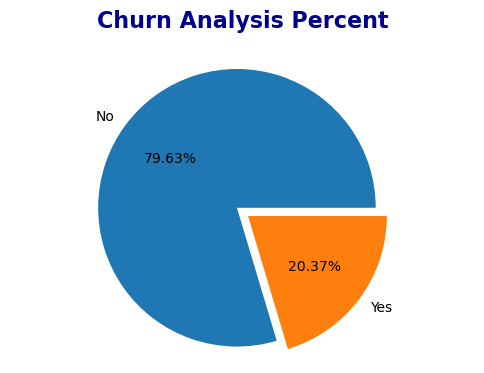

In [12]:
explode = (0.1, 0)
plt.figure(figsize=(6,4))
plt.pie(df['Churn'].value_counts(), labels=['No','Yes'], explode = explode, autopct='%1.2f%%')
plt.title("Churn Analysis Percent", fontsize=16, fontweight='bold', color='darkblue', pad=20)
plt.axis('equal')
plt.show()

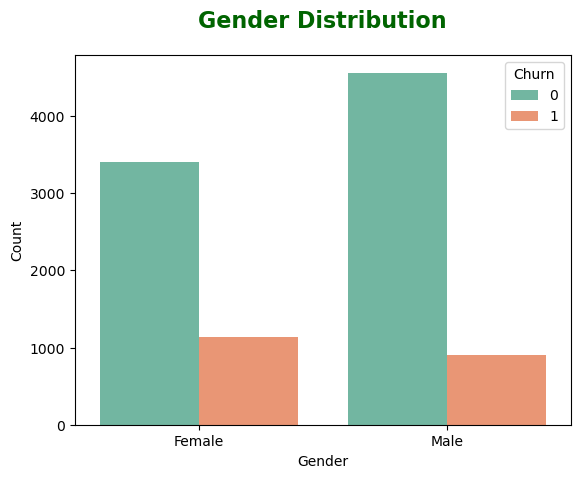

In [14]:
import seaborn as sns

sns.countplot(x = 'Gender', data = df, hue = 'Churn', palette = "Set2")
plt.title("Gender Distribution", fontsize=16, fontweight='bold', color='darkgreen', pad=20)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Count')

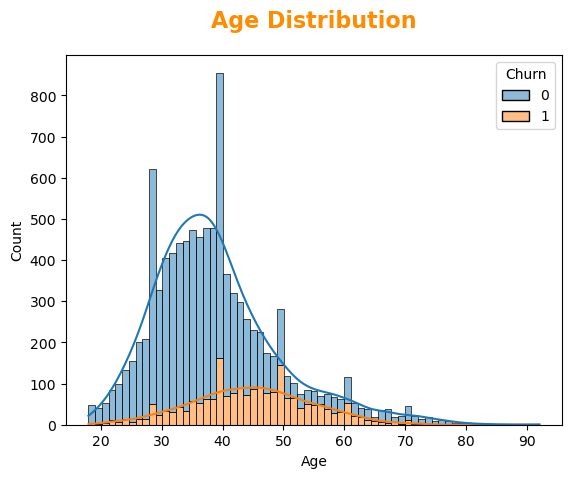

In [15]:
sns.histplot(data=df, x="Age", hue="Churn", multiple="stack",kde=True)
plt.title("Age Distribution", fontsize=16, fontweight='bold', color='darkorange', pad=20)
plt.xlabel('Age')
plt.ylabel('Count')

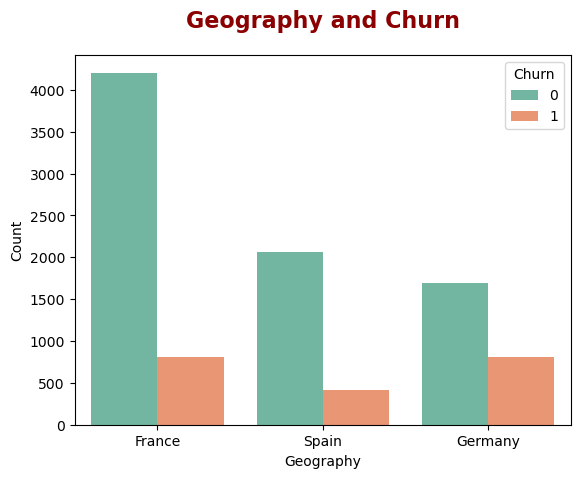

In [16]:
sns.countplot(x = 'Geography', hue = 'Churn', data = df, palette = 'Set2')
plt.title('Geography and Churn', fontsize=16, fontweight='bold', color='darkred', pad=20)
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Bank Balance')

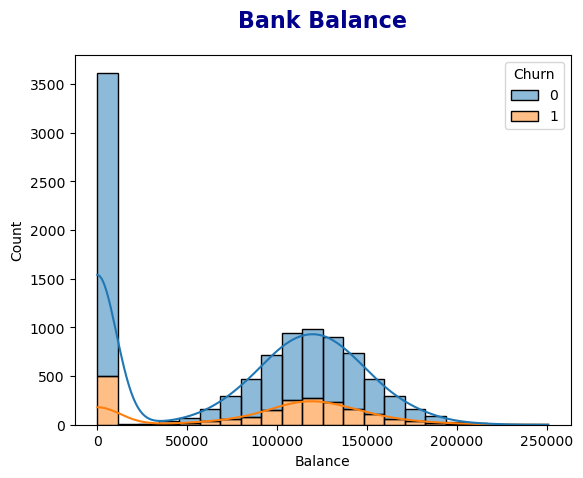

In [17]:
sns.histplot(data=df, x="Balance", hue="Churn", multiple="stack",kde=True)
plt.title("Bank Balance", fontsize=16, fontweight='bold', color='darkblue', pad=20)

Text(0.5, 1.0, 'Products Purchased')

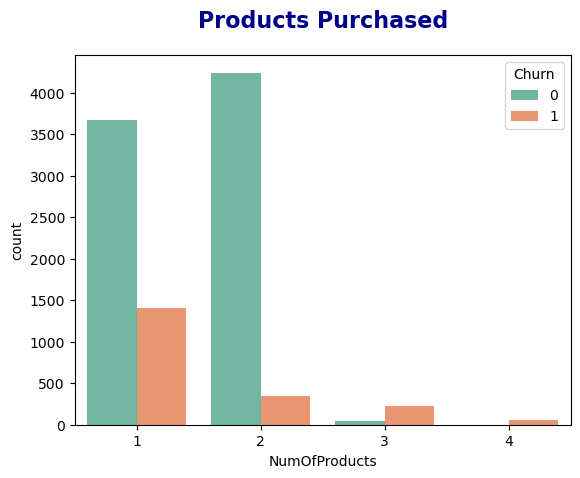

In [18]:
sns.countplot(x='NumOfProducts', hue='Churn', data=df, palette = "Set2")
plt.title("Products Purchased", fontsize=16, fontweight='bold', color='darkblue', pad=20)

Text(0.5, 1.0, 'Has Credit Card')

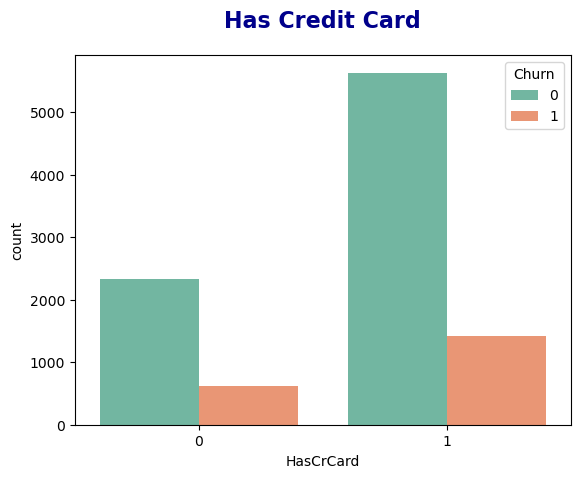

In [19]:
sns.countplot(x='HasCrCard',hue='Churn', data = df, palette = "Set2")
plt.title("Has Credit Card", fontsize=16, fontweight='bold', color='darkblue', pad=20)

Text(0.5, 1.0, 'Active Member')

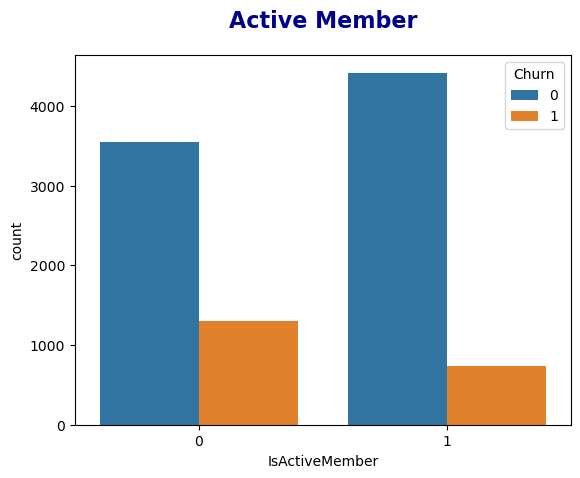

In [20]:
sns.countplot(x='IsActiveMember', hue='Churn', data=df)
plt.title("Active Member", fontsize=16, fontweight='bold', color='darkblue', pad=20)

In [22]:
#label encoding
var = ['Geography','Gender']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in var:
    le.fit(df[i].unique())
    df[i]=le.transform(df[i])
    print(i,df[i].unique())

Geography [0 2 1]
Gender [0 1]


In [23]:
#normalizing the continuous variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['CreditScore','Balance','EstimatedSalary']] = scaler.fit_transform(df[['CreditScore','Balance','EstimatedSalary']])

In [24]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,-0.326221,0,0,42,2,-1.225848,1,1,1,0.021886,1
1,-0.440036,2,0,41,1,0.117350,1,0,1,0.216534,0
2,-1.536794,0,0,42,8,1.333053,3,1,0,0.240687,1
3,0.501521,0,0,39,1,-1.225848,2,0,0,-0.108918,0
4,2.063884,2,0,43,2,0.785728,1,1,1,-0.365276,0


## Train test split

In [25]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('Churn',axis=1),df['Churn'],test_size=0.3,random_state=42)

## Churn Prediction
For predicting the churn of customers, depending on the data of the customers, we will use: Decision Tree Classifier and Random Forest Classifier model

### Decision Tree Classifier
Using GridSearchCV to find the best parameters for the model.

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
#creating Decision Tree Classifer object
dtree = DecisionTreeClassifier()

#defining parameter range
param_grid = {
    'max_depth': [2,4,6,8,10,12,14,16,18,20],
    'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
    }

#Creating grid search object
grid_dtree = GridSearchCV(dtree, param_grid, cv = 5, scoring = 'roc_auc', n_jobs = -1, verbose = 1)

#Fitting the grid search object to the training data
grid_dtree.fit(X_train, y_train)

#Printing the best parameters
print('Best parameters found: ', grid_dtree.best_params_)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 9, 'random_state': 0}


In [29]:
dtree = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=42, min_samples_leaf=10)
dtree

DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, random_state=42)

In [30]:
#training the model
dtree.fit(X_train,y_train)
#training accuracy
dtree.score(X_train,y_train)

0.8581428571428571

In [31]:
# predicting customer churn from test data
dtree_pred = dtree.predict(X_test)

### Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
#creating Random Forest Classifer object
rfc = RandomForestClassifier()

#defining parameter range
param_grid = {
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf': [2,4,6,8,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
    }

#Creating grid search objectx
grid_rfc = GridSearchCV(rfc, param_grid, cv = 5, scoring = 'roc_auc', n_jobs = -1, verbose = 1)

#Fitting the grid search object to the training data
grid_rfc.fit(X_train, y_train)

#Printing the best parameters
print('Best parameters found: ', grid_rfc.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 8, 'random_state': 0}


In [33]:
rfc = RandomForestClassifier(min_samples_leaf=8, max_depth=10, random_state=0, criterion='entropy')
rfc

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=8,
                       random_state=0)

In [34]:
#training the model
rfc.fit(X_train, y_train)
#model accuracy
rfc.score(X_train, y_train)

0.8767142857142857

In [35]:
# predicting the customer churn from test data
rfc_pred = rfc.predict(X_test)

## Model Evaluation

### Confusion Matrix Heatmap

#### Decision Tree Classifier

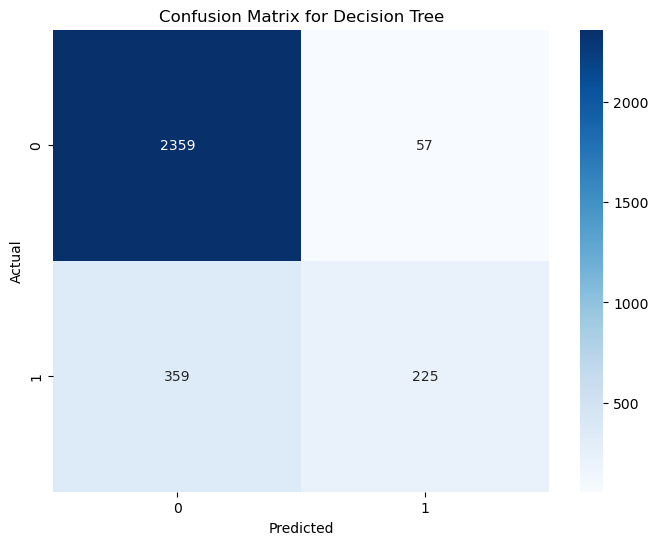

In [36]:
#confusion matrix heatmap
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,dtree_pred),annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

The True Positive shows the count of correctly classified data points whereas the False Positive elements are those that are misclassified by the model. The higher the True Positive values of the confusion matrix the better, indicating many correct predictions

In [38]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2416
           1       0.80      0.39      0.52       584

    accuracy                           0.86      3000
   macro avg       0.83      0.68      0.72      3000
weighted avg       0.85      0.86      0.84      3000



In [39]:
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score
print("Accuracy Score: ", accuracy_score(y_test, dtree_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, dtree_pred))
print("R2 Score: ", r2_score(y_test, dtree_pred))

Accuracy Score:  0.8613333333333333
Mean Absolute Error:  0.13866666666666666
R2 Score:  0.11548580241313633


### Random Forest Classifier
#### Confusion Matrix Heatmap

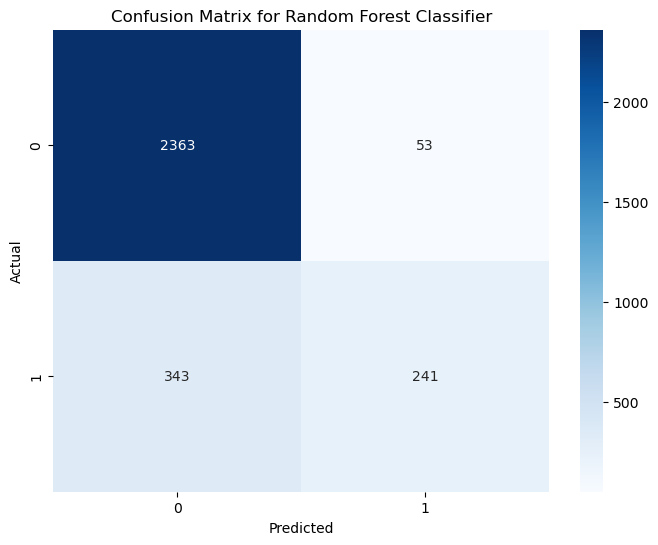

In [40]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,rfc_pred),annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

/var/folders/3t/hrj8d9xd7v5_bx8x5lxwjtpw0000gn/T/ipykernel_33205/1271848208.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
/var/folders/3t/hrj8d9xd7v5_bx8x5lxwjtpw0000gn/T/ipykernel_33205/1271848208.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974

<Axes: xlabel='Churn', ylabel='Density'>

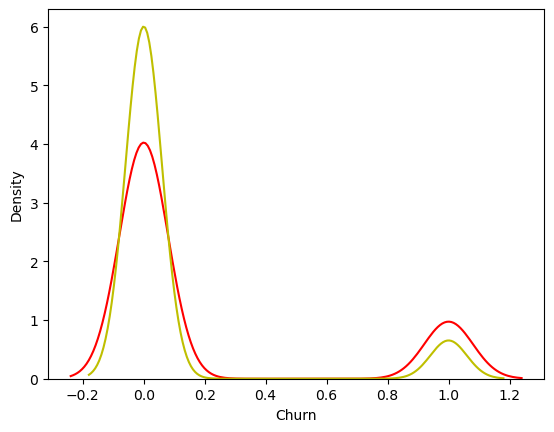

In [51]:
# Distriution plot
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(rfc_pred, hist=False, color="y", label="Fitted Values" , ax=ax)

In [42]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2416
           1       0.82      0.41      0.55       584

    accuracy                           0.87      3000
   macro avg       0.85      0.70      0.74      3000
weighted avg       0.86      0.87      0.85      3000



In [43]:
print("Accuracy Score: ", accuracy_score(y_test, rfc_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, rfc_pred))
print("R2 Score: ", r2_score(y_test, rfc_pred))

Accuracy Score:  0.868
Mean Absolute Error:  0.132
R2 Score:  0.15801052345096633


## Conclusion

From the exploratory data analysis, I have concluded that the churn count of the customers depends upon these following factors: Age, Geography, Tenure, Balance, Number of Products, Has Credit Card, Is Active Member

Coming to the classification models, I have used the following models:

#### Decision Tree Classifier, Random Forest Classifier

Both the models were hyperparameter tuned using GridSearchCV. Both the models have nearly equal accuracy score. But, the Random Forest Classifier has a better accuracy and precision score than the Decision Tree Classifier.